<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [32]:
import pygimli as pg
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import os
from os import system
import numpy as np

In [33]:
def callTriangle(filename,
                 quality=33, 
                 triangle='triangle',
                 verbose=True):
    
    filebody = filename.replace('.poly', '')

    syscal = triangle + ' -pq' + str(quality)
    syscal += 'Aa ' + filebody + '.poly'
 
    if verbose:
        print(syscal)

    system(syscal)

In [34]:
world = mt.createWorld(start=[-2e5, -2e5], 
                       end=[2e5, 2e5], 
                       layers=[0, 75e3], 
                       area=[0, 1e7, 0],
                       marker=[1, 2, 3],
                       worldMarker=False)

In [35]:
blockleft = mt.createRectangle(start=[-22e3, 7e3],
                           end=[-4e3, 9e3],
                           marker=4,  
                           markerPosition=[-18e3, 8e3], 
                           area=1e4, boundaryMarker=10)

In [36]:
blockright = mt.createRectangle(start=[10e3, 7e3],
                           end=[22e3, 9e3],
                           marker=5,  
                           markerPosition=[18e3, 8e3], 
                           area=1e4, boundaryMarker=12)

In [37]:
geom = world + blockleft + blockright

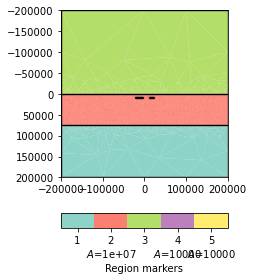

In [38]:
ax, _ = pg.show(geom, 
                showNodes=False, 
                boundaryMarker=False)
ax.set_ylim(ax.get_ylim()[::-1]);

In [39]:
mt.exportPLC(geom,
             'meshes/commemi2d2.poly', 
             float_format='.8e')

In [40]:
callTriangle('meshes/commemi2d2.poly', 
             quality=34.2,
             verbose=False)

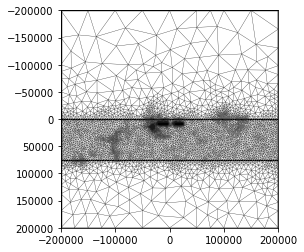

In [41]:
mesh = mt.createMesh(geom, quality=34.2)
ax, _ = pg.show(mesh)
ax.set_ylim(ax.get_ylim()[::-1]);